In [4]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import scipy as sp
from scipy.integrate import odeint, ode, solve_ivp
from sympy.solvers import solve
from scipy import interpolate
import sympy 
from scipy.linalg import eig
from scipy.optimize import root_scalar



# Problem 1

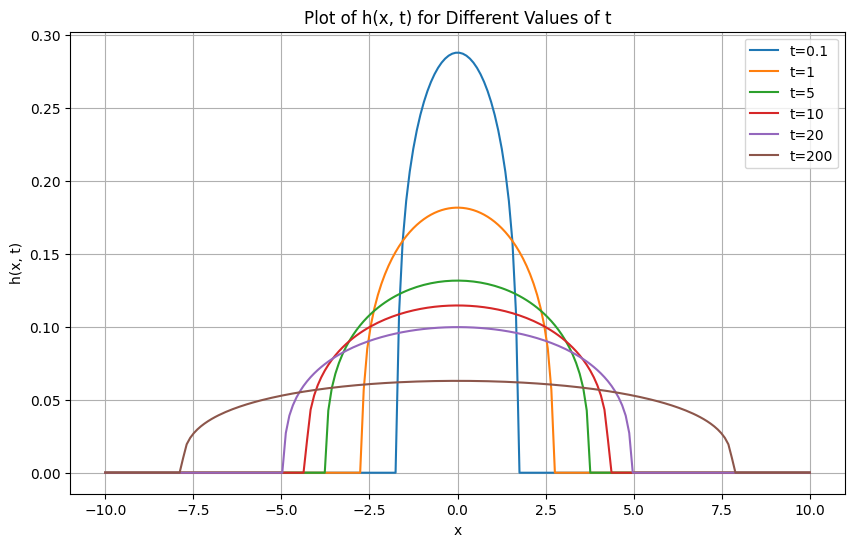

In [17]:
# Define the function h(x, t)
def h(x, t):
    if (-2.7 * t**0.2 <= x <= 2.7 * t**0.2):
        return t**(-0.2) * (-8.2e-4 * t**(-0.4) * x**2 + 6e-3)**(1/3)
    else:
        return 0

# Define x values and t values
x_min = -10
x_max = 10
Nx = 200
x_vals = np.linspace(x_min, x_max, Nx)
t_vals = [0.1, 1, 5, 10, 20, 200]

# Plot for each t
plt.figure(figsize=(10, 6))
for t in t_vals:
    h_vals = [h(x, t) for x in x_vals]
    plt.plot(x_vals, h_vals, label=f"t={t}")

# Labels and title
plt.xlabel("x")
plt.ylabel("h(x, t)")
plt.title("Plot of h(x, t) for Different Values of t")
plt.legend()
plt.grid()

# Show the plot
plt.show()


# Problem 2

In [8]:
def approx_sol(x,epsilon = 0.01):
    return np.exp(1)*(np.exp(-x) - np.exp(-2*x/epsilon))

In [27]:
def real_sol(x,epsilon): 
    a1 = (-1 + np.sqrt(1-2*epsilon))/epsilon
    a2 = (-1 - np.sqrt(1-2*epsilon))/epsilon
    c1 = 1/(np.exp(a1)-np.exp(a2))
    c2 = -c1
    return c1*np.exp(a1*x) + c2*np.exp(a2*x) 

In [33]:
def strange_sol(x,epsilon):
    return 2*np.exp(1)/epsilon * np.exp(-x) + x*np.exp(1-x) - 2*np.exp(1-x)

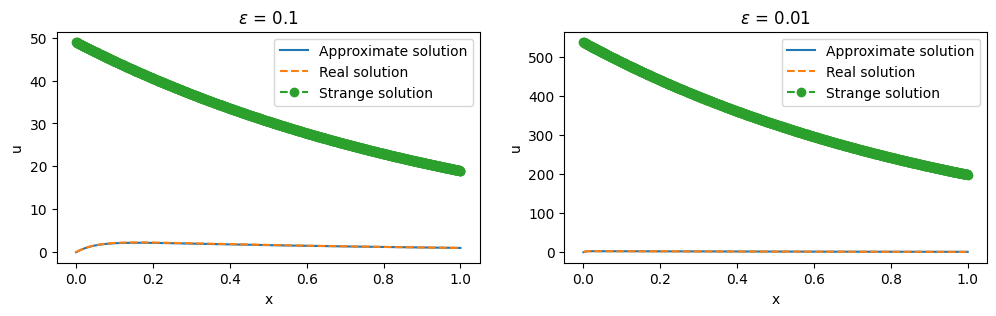

In [34]:
x = np.linspace(0,1,1000)
fig,ax = plt.subplots(1,2,figsize = (12,3))
for i,epsilon in enumerate([0.1,0.01]):
    ax[i].plot(x,approx_sol(x,epsilon),label ='Approximate solution')
    ax[i].plot(x,real_sol(x,epsilon),linestyle='dashed', label = 'Real solution')
    ax[i].plot(x,strange_sol(x,epsilon),linestyle = 'dashed',marker = 'o', label = 'Strange solution')
    ax[i].set_title(rf'$\varepsilon$ = {epsilon}')
    ax[i].legend()
    ax[i].set_xlabel('x')
    ax[i].set_ylabel('u')
    

# Problem 3

$$f''' + \frac{1}{2}ff'' = 0$$
Boundary conditons: 
$$f(0) = f'(0) = 0, \ f'(+\infty) = 1$$
Let $u_1 = f, \ u_2 = f', \ u_3 = f''$. Then equation transforms to: 
\begin{equation}
\begin{cases}
u_1' = u_2,
\\u_2' = u_3,
\\u_3' = -\frac{1}{2}u_1\cdot u_3,
\\u_1(0) = 0,
\\u_2(0) = 0,
\\u_2(+\infty) = 1. 
\end{cases}
\end{equation}

Initial value: 0.33205733448266983 for x_max = 100


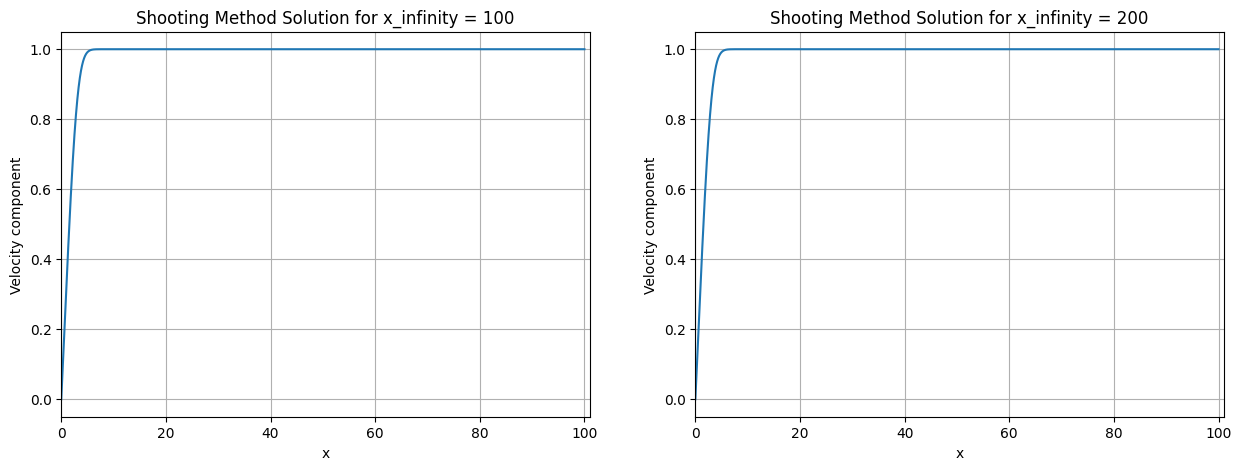

In [19]:
# Set a sufficiently large x_max to approximate "infinity"
x_max = 100
# Define the system of first-order ODEs
def odes(x, y):
    # y[0] = u1, y[1] = u2, y[2] = u3
    return [y[1], y[2], -0.5 * y[0] * y[2]]

# Define the shooting function
def shoot(guess):
    sol = solve_ivp(odes, [0, x_max], [0, 0, guess], method='RK45', dense_output=True,rtol = 1e-9, atol = 1e-10)
    
    u1, u2, u3 = sol.sol(x_max)  # Extract components at x_max
    return u2 - 1 # We want u2(x_max) to be close to 1


result = root_scalar(shoot, bracket=[0,2], method='bisect', xtol=1e-8)
x_eval = np.linspace(0, x_max, 100000)
if result.converged:
    initial_value = result.root
    print(f"Initial value: {initial_value} for x_max = {x_max}")

    solutions = []
    check = [x_max,x_max*2]
    fig,ax = plt.subplots(1,len(check),figsize = (15,5))
    for i,x_infinity in enumerate(check):
            
            sol = solve_ivp(odes, [0, x_infinity], [0, 0, initial_value],method='BDF', t_eval=x_eval,dense_output=True,rtol = 1e-9, atol = 1e-10)
            solutions.append(sol.y[1])
            # Plot the results
            #plt.plot(sol.t, sol.y[0], label="$u_1(x)$")
            ax[i].plot(sol.t, sol.y[1], label="$u_2(x)$")
            #plt.plot(sol.t, sol.y[2], label="$u_3(x)$")
            ax[i].set_xlabel('x')
            ax[i].set_xlim([0,x_max+1])
            #ax[i].set_ylim([0,1])
            ax[i].set_ylabel('Velocity component')
            ax[i].set_title(f"Shooting Method Solution for x_infinity = {x_infinity}")
            #ax[i].legend()
            ax[i].grid(True)
    
else:
    print("The shooting method did not converge.")


In [20]:
np.round(sol.y[2][0],4)

0.3321

In [21]:
u1 = sol.y[1]

In [22]:
min = 10
k = 0
for i in range(len(u1)):
    if abs(u1[i] - 0.5)<min: 
        k = i
        min = abs(u1[i] - 0.5)

In [23]:
sol.t[k]

1.5440154401544015

In [24]:
k

1544

In [25]:
sol.y[0][k]

0.3918570735329226

In [26]:
sol.y[2][k]

0.3000543237234744

In [27]:
sol.y[1][k]

0.5000523634442047